# Q1

For any positive integer $n$, consider the European "power put" payoff

$$
G_n(x) = H_n(e^x) = [(K - e^x)^+]^n
$$

## (a) Shifted/modulated Fourier transform $\widehat G_n(\omega - i\beta)$

By definition,

$$
\widehat G_n(\omega - i\beta) = \int_{-\infty}^{+\infty} G_n(x) e^{-i(\omega - i\beta)x} dx
$$

Since $(K-e^x)^+ = 0$ when $x > \log K$ and $(K-e^x)^+ = K-e^x$ when $x \le \log K$, we have

$$
\widehat G_n(\omega - i\beta) = \int_{-\infty}^{\log K} (K-e^x)^n e^{-i(\omega - i\beta)x} dx = \int_{-\infty}^{\log K} (K-e^x)^n e^{(-i\omega-\beta)x} dx
$$

Use the binomial expansion:

$$
(K-e^x)^n = \sum_{j=0}^n \binom{n}{j} K^{n-j}(-1)^j e^{jx}
$$

Substitute into the integral:

$$
\widehat G_n(\omega - i\beta) = \sum_{j=0}^n \binom{n}{j} K^{n-j}(-1)^j \int_{-\infty}^{\log K} e^{(j - i\omega - \beta)x} dx
$$

The inner integral is

$$
\int_{-\infty}^{\log K} e^{(j - i\omega - \beta)x} dx = \left. \frac{e^{(j - i\omega - \beta)x}}{j - i\omega - \beta} \right|_{x=-\infty}^{x=\log K}
$$

which converges if and only if

$$
\Re(j - i\omega - \beta) > 0
$$

Writing $\omega = u + iv$ with $u,v \in \mathbb{R}$,

$$
j - i\omega - \beta = j - \beta - iu + v, \quad \Re(j - i\omega - \beta) = j - \beta + v
$$

For all $j=0,\dots,n$, this is guaranteed whenever

$$
v > \beta
$$

In particular, for real $\omega$ (i.e., $v=0$), we require

$$
0 > \beta \quad \Longleftrightarrow \quad \beta < 0
$$

Under this condition, the $x \to -\infty$ endpoint vanishes and we obtain

$$
\int_{-\infty}^{\log K} e^{(j - i\omega - \beta)x} dx = \frac{K^{j - i\omega - \beta}}{j - i\omega - \beta}
$$

Therefore,

$$
\widehat G_n(\omega - i\beta) = \sum_{j=0}^n \binom{n}{j} K^{n-j}(-1)^j \frac{K^{j - i\omega - \beta}}{j - i\omega - \beta} = K^{n - \beta - i\omega} \sum_{j=0}^n \binom{n}{j} \frac{(-1)^j}{j - \beta - i\omega}
$$

**Domain in $\beta$**: For the transform $\widehat G_n(\omega - i\beta)$ to be well-defined for all real $\omega$, the integral must converge at $x \to -\infty$, which requires $\beta < 0$. More generally, for complex $\omega$ the condition is $\Im(\omega) > \beta$.

## (b) Integral representation of the power put price via power-payoff options

Let $S_T$ denote the terminal stock price at maturity $T>0$ and let $r$ be the risk-free rate. The European power put payoff can be written as

$$
H_n(S_T) = [(K-S_T)^+]^n = G_n(\log S_T)
$$

From the (shifted) Fourier inversion formula, for any $\beta<0$ such that the relevant integrals exist,

$$
G_n(x) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \widehat G_n(\omega - i\beta) e^{(\beta + i\omega)x} d\omega
$$

hence

$$
H_n(S_T) = G_n(\log S_T) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \widehat G_n(\omega - i\beta) S_T^{\beta + i\omega} d\omega
$$

Under the risk-neutral measure $Q$, the arbitrage-free time-0 price of the power put is

$$
\pi_0^{(n)}(K) = e^{-rT} \mathbb{E}^Q[H_n(S_T)] = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \widehat G_n(\omega - i\beta) e^{-rT} \mathbb{E}^Q[S_T^{\beta + i\omega}] d\omega
$$

Now introduce, for each complex $z$ in the region where the moment exists, the price of a **power option** with payoff $H(x)=x^z$:

$$
\Pi(z) := \pi_0(S_T^z) = e^{-rT} \mathbb{E}^Q[S_T^z]
$$

Then, setting $z = \beta + i\omega$ in the formula above,

$$
\pi_0^{(n)}(K) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} \widehat G_n(\omega - i\beta) \Pi(\beta + i\omega) d\omega, \quad \beta<0
$$

Substituting the explicit expression for $\widehat G_n(\omega - i\beta)$ from part (a),

$$
\widehat G_n(\omega - i\beta) = K^{n - \beta - i\omega} \sum_{j=0}^n \binom{n}{j} \frac{(-1)^j}{j - \beta - i\omega}
$$

we obtain the concrete representation

$$
\pi_0^{(n)}(K) = \frac{1}{2\pi} \int_{-\infty}^{+\infty} K^{n - \beta - i\omega} \left[ \sum_{j=0}^n \binom{n}{j} \frac{(-1)^j}{j - \beta - i\omega} \right] \Pi(\beta + i\omega) d\omega, \quad \beta<0
$$

Thus, the price of the European power put can be written as a continuous superposition of prices of power-payoff options with payoffs $H(x) = x^z$ for complex exponents $z = \beta + i\omega$.

# Q2

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.integrate import quad
from scipy.optimize import differential_evolution, brentq
from scipy.stats import norm
from scipy.optimize import root_scalar

# ============================================================================
# HELPER FUNCTIONS FROM TEMPLATE
# ============================================================================

def HestonFourierPrice(T, F, D, v0, vBar, lambda_, eta, rho, payoffFourierTransform, beta):
    """
    Compute Heston price of a European contingent claim via Fourier transform
    """
    f = np.log(F)
    rhoEta = rho * eta
    eta2 = eta ** 2
    lambdaOverEta2 = lambda_ / eta2
    
    def CharacteristicFunctionPrice(z):
        tmp1 = lambda_ - rhoEta * z
        d = np.sqrt(tmp1 ** 2 - eta2 * z * (z - 1))
        tmp2 = tmp1 - d
        tmp3 = np.exp(-d * T)
        g = tmp2 / (tmp1 + d)
        tmp4 = g * tmp3 - 1
        C = lambdaOverEta2 * (tmp2 * T - 2 * np.log(tmp4 / (g - 1)))
        D = (tmp2 / eta2) * ((tmp3 - 1) / tmp4)
        return np.exp(z * f + C * vBar + D * v0)
    
    def Integrand(omega):
        return np.real(payoffFourierTransform(omega - 1j * beta) * 
                      CharacteristicFunctionPrice(beta + 1j * omega))
    
    return D * quad(Integrand, 0, np.inf, full_output=1)[0] / np.pi


def CallPayoffFourierTransform(K):
    """
    Generates the Fourier transform of a European call option payoff with strike K
    """
    k = np.log(K)
    def Ghat(omega):
        iomega = 1j * omega
        return np.exp((1 - iomega) * k) / (iomega * (iomega - 1))
    return Ghat


def black_call(F, K, T, sigma, D):
    if sigma <= 0:
        return max(D * (F - K), 0.0)
    st = sigma * np.sqrt(T)
    d1 = np.log(F / K) / st + 0.5 * st
    d2 = d1 - st
    return D * (F * norm.cdf(d1) - K * norm.cdf(d2))

def implied_vol(C_mkt, F, K, T, D):
    def f(sig):
        return black_call(F, K, T, sig, D) - C_mkt
    try:
        return brentq(f, 1e-6, 5)
    except:
        return np.nan


def estimateDiscountFactor(row):
    """Estimate discount factor from put-call parity"""
    avgK = row['Strike Price'].mean()
    avgO = (row['Call Premium'] - row['Put Premium']).mean()
    avgKK = (row['Strike Price'] ** 2).mean()
    avgKO = (row['Strike Price'] * (row['Call Premium'] - row['Put Premium'])).mean()
    return (avgKO - avgK * avgO) / (avgK ** 2 - avgKK)


def estimateForwardPrice(row):
    """Estimate forward price from put-call parity"""
    avgK = row['Strike Price'].mean()
    avgO = (row['Call Premium'] - row['Put Premium']).mean()
    avgKK = (row['Strike Price'] ** 2).mean()
    avgKO = (row['Strike Price'] * (row['Call Premium'] - row['Put Premium'])).mean()
    return (avgK * avgKO - avgKK * avgO) / (avgKO - avgK * avgO)


In [2]:
# ============================================================================
# QUESTION 2: HESTON CALIBRATION
# ============================================================================

print("="*80)
print("QUESTION 2: HESTON MODEL CALIBRATION")
print("="*80)

data = pd.read_csv('Midprices.csv')
target_data = data[(data['As of Date'] == '8/7/2024') & 
                    (data['Expiration Date'] == '9/6/2024')]

target_strikes = [5105, 5155, 5205, 5255, 5305]
market_data = target_data[target_data['Strike Price'].isin(target_strikes)].copy()
market_data = market_data.sort_values('Strike Price')

market_call_prices = market_data['Call Premium'].values
strikes = market_data['Strike Price'].values
S0 = market_data['Underlying Price'].iloc[0]
T = market_data['Time to Expiration'].iloc[0]

D = estimateDiscountFactor(target_data)
F = estimateForwardPrice(target_data)

print(f"\nData: S0={S0:.2f}, F={F:.2f}, D={D:.6f}, T={T:.4f}")

v0, vBar, lambda_ = 0.08364961, 0.05127939, 1.697994

def objective(params):
    eta, rho = params
    if eta <= 0 or rho < -1 or rho > 1:
        return 1e10
    try:
        model_prices = [HestonFourierPrice(T, F, D, v0, vBar, lambda_, eta, rho,
                                            CallPayoffFourierTransform(K), beta=1.5)
                        for K in strikes]
        return np.sum((market_call_prices - np.array(model_prices))**2)
    except:
        return 1e10

print("\nCalibrating...")
result = differential_evolution(objective, bounds=[(0.0001, 20), (-1, 1)],
                                seed=0, polish=True, maxiter=10000)

eta_cal, rho_cal = result.x
print(f"\n*** CALIBRATED PARAMETERS ***")
print(f"η = {eta_cal:.6f}")
print(f"ρ = {rho_cal:.6f}")

feller = 2 * lambda_ * vBar
print(f"\n*** FELLER'S CONDITION ***")
print(f"2λv̄ = {feller:.6f},  η² = {eta_cal**2:.6f}")
print(f"Satisfied: {feller >= eta_cal**2}")

print(f"\n*** FIT QUALITY ***")
for i, K in enumerate(target_strikes):
    mp = HestonFourierPrice(T, F, D, v0, vBar, lambda_, eta_cal, rho_cal,
                            CallPayoffFourierTransform(K), beta=1.5)
    print(f"K={K}: Market={market_call_prices[i]:.2f}, Model={mp:.2f}")


QUESTION 2: HESTON MODEL CALIBRATION

Data: S0=5202.94, F=5219.88, D=0.995123, T=0.0833

Calibrating...

*** CALIBRATED PARAMETERS ***
η = 2.922611
ρ = -0.433312

*** FELLER'S CONDITION ***
2λv̄ = 0.174144,  η² = 8.541655
Satisfied: False

*** FIT QUALITY ***
K=5105: Market=206.25, Model=207.79
K=5155: Market=171.76, Model=171.57
K=5205: Market=139.83, Model=138.55
K=5255: Market=110.80, Model=109.84
K=5305: Market=85.04, Model=86.37


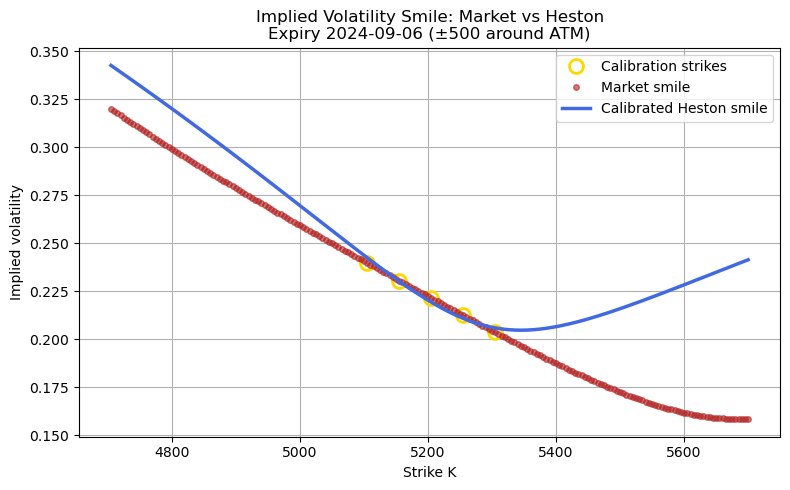

In [3]:
# ------------------------- Build strike slice (±500) ------------------------- #

atm_center = S0  # treat spot as ATM
smile_slice = target_data[
    (target_data["Strike Price"] >= atm_center - 500) &
    (target_data["Strike Price"] <= atm_center + 500)
].copy()

# 防止有重复行权价：对每个K取平均call mid price
smile_grouped = (
    smile_slice.groupby("Strike Price")["Call Premium"]
    .mean()
    .reset_index()
)

K_smile        = smile_grouped["Strike Price"].values.astype(float)
C_smile_market = smile_grouped["Call Premium"].values.astype(float)

# --------------------------- Market implied vols ---------------------------- #

iv_market = np.array([
    implied_vol(c, F, K, T, D)
    for c, K in zip(C_smile_market, K_smile)
])

# --------------------------- Heston implied vols ---------------------------- #

C_smile_heston = np.array([
    HestonFourierPrice(
        T, F, D,
        v0, vBar, lambda_,
        eta_cal, rho_cal,
        CallPayoffFourierTransform(K),
        beta=1.5
    )
    for K in K_smile
])

iv_heston = np.array([
    implied_vol(c, F, K, T, D)
    for c, K in zip(C_smile_heston, K_smile)
])
# Mark calibration points
calib_iv_mkt = []
for k in target_strikes:
    idx = np.where(K_smile == k)[0]
    if len(idx) > 0:
        calib_iv_mkt.append(iv_market[idx[0]])

# --------------------------------- Plot ------------------------------------ #
plt.figure(figsize=(8, 5))
plt.plot(target_strikes, calib_iv_mkt, 'o', markersize=10, color='gold',
         markeredgewidth=2, markerfacecolor='none',
         label='Calibration strikes')
plt.plot(K_smile, iv_market, "o", label="Market smile",linestyle="", alpha=0.6, color="firebrick", markersize=4)
plt.plot(K_smile, iv_heston, linewidth=2.5, color="royalblue", label="Calibrated Heston smile")
plt.xlabel("Strike K")
plt.ylabel("Implied volatility")
plt.title("Implied Volatility Smile: Market vs Heston\nExpiry 2024-09-06 (±500 around ATM)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

### Quality of Fit

Figure 1 compares the market implied volatility smile and the smile generated by the calibrated Heston model for the 9/6/2024 expiry.

The Heston model provides a **good local fit** around the five calibration strikes (5105--5305).  
In this region, the model-implied volatilities lie very close to the market values, indicating that the calibration successfully matches the target option prices.

However, the **global fit over the entire ±500 strike range** is noticeably imperfect:

- **Left wing (low strikes):**  
  The Heston smile lies above the market smile, meaning the model **overestimates implied volatilities** for deep ITM puts / low-strike calls.

- **Right wing (high strikes):**  
  The Heston smile exhibits a pronounced **U-shape**, bending upward for higher strikes, whereas the market smile continues to decline.  
  This behavior reflects a structural feature of the Heston model: it tends to generate excessive convexity in the smile and cannot fully reproduce the nearly linear negative skew observed in the SPX market data.

**Summary:**  
The Heston model fits the ATM region well but fails to match the market skew on both wings, producing too much curvature compared to the market's mostly linear downward profile.


### Feller's Condition

The variance process in the Heston model is:

$ dv_t = \lambda(\bar v - v_t)dt + \eta \sqrt{v_t} dZ_t $

Feller's condition for the CIR process to remain strictly positive is:

$ 2\lambda \bar v \ge \eta^2 $

Using the calibrated parameters:

$ \lambda = 1.697994, \qquad \bar v = 0.05127939, \qquad \eta = 2.922611 $

we obtain:

$ 2\lambda \bar v = 0.174144, \qquad \eta^2 = 8.541655 $

Since:

$ 2\lambda \bar v \ll \eta^2 $

**Feller's condition is not satisfied**.  
This implies that the variance process may hit zero under the calibrated parameters.  
Such violations are common in market calibration and do not generally prevent stable numerical pricing, but they should be noted in the model assessment.

# Q3


Computing n = 1 (using β = -0.5)...
  Progress: 0/120
  Progress: 20/120
  Progress: 40/120
  Progress: 60/120
  Progress: 80/120
  Progress: 100/120
Computed 114 prices
  K=   300: 1.301485e-05
  K=  3500: 1.836929e+00
  K=  6400: 1.176850e+03
  K=  9200: 3.960717e+03
  K= 12000: 6.747056e+03

Computing n = 2 (using β = -0.5)...
  Progress: 0/120
  Progress: 20/120
  Progress: 40/120
  Progress: 60/120
  Progress: 80/120
  Progress: 100/120
Computed 116 prices
  K=   100: 4.629361e-04
  K=  3400: 8.358525e+02
  K=  6300: 1.326913e+06
  K=  9200: 1.593261e+07
  K= 12000: 4.591436e+07

Computing n = 3 (using β = -0.5)...
  Progress: 0/120
  Progress: 20/120
  Progress: 40/120
  Progress: 60/120
  Progress: 80/120
  Progress: 100/120
Computed 117 prices
  K=   100: 1.080820e-03
  K=  3300: 4.875409e+05
  K=  6200: 1.507287e+09
  K=  9100: 6.016386e+10
  K= 12000: 3.136606e+11

MONOTONICITY CHECK
n=1: Monotonically increasing? False
  (Note: 2 decrease(s))
n=2: Monotonically increasing? 

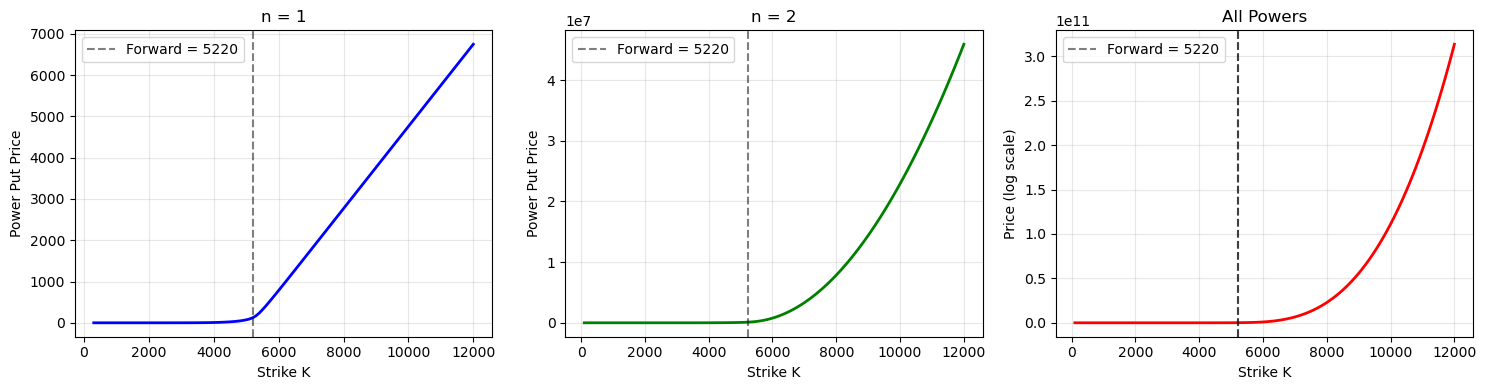

Saved: q3_power_put.csv


In [ ]:
from scipy.integrate import quad
from scipy.optimize import differential_evolution
from scipy.special import comb

# ============================================================================
# QUESTION 3: POWER PUT PRICING 
# ============================================================================

def PowerPutPayoffFourierTransform(K, n):
    """
    Fourier transform of power put payoff [(K - e^x)^+]^n
    
    From Q4 solution:
    Ĝ_n(ω) = K^(n-iω) * Σ_{j=0}^n C(n,j) * (-1)^j / (j - iω)
    
    Valid for Im(ω) > 0
    
    This is the KEY insight: we can directly use this as payoffFourierTransform!
    """
    k = np.log(K)
    
    def Ghat(omega):
        """
        Compute Ĝ_n(ω) using the formula from Q4 solution.
        """
        iomega = 1j * omega
        
        # K^(n-iω) * Σ C(n,j) * (-1)^j / (j - iω)
        result = K**(n - iomega)
        
        sum_term = 0.0
        for j in range(n + 1):
            binomial_coeff = comb(n, j, exact=True)
            sum_term += binomial_coeff * ((-1)**j) / (j - iomega)
        
        return result * sum_term
    
    return Ghat

K_range = np.arange(100, 12001, 100)
powers = [1, 2, 3]
results = {}

# From Q1: Ĝ_n(ω) is valid for Im(ω) > 0
# From Q1: Use β < 0 to ensure Ĝ_n(ω - iβ) is defined for all real ω
#
# Analysis: For ω real and β real:
#   ω - iβ has imaginary part = Im(ω - iβ) = -β
#   We need -β > 0, so β < 0
#
beta = -0.5  # NEGATIVE beta as required by Q5 solution

for n in powers:
    print(f"\nComputing n = {n} (using β = {beta})...")
    prices = []
    valid_strikes = []
    
    for i, K in enumerate(K_range):
        if i % 20 == 0:
            print(f"  Progress: {i}/{len(K_range)}")
        
        try:
            price = HestonFourierPrice(T, F, D, v0, vBar, lambda_, eta_cal, rho_cal,
                                        PowerPutPayoffFourierTransform(K, n), 
                                        beta=beta)
            
            if price >= 0:
                prices.append(price)
                valid_strikes.append(K)
        except Exception as e:
            print(f"    Error at K={K}: {e}")
            continue
    
    results[n] = {'strikes': np.array(valid_strikes), 
                    'prices': np.array(prices)}
    
    print(f"Computed {len(prices)} prices")
    if len(prices) >= 5:
        indices = [0, len(prices)//4, len(prices)//2, 3*len(prices)//4, -1]
        for idx in indices:
            print(f"  K={valid_strikes[idx]:6.0f}: {prices[idx]:.6e}")

# Verify monotonicity
print("\n" + "="*80)
print("MONOTONICITY CHECK")
print("="*80)
for n in powers:
    prices = results[n]['prices']
    if len(prices) > 1:
        diffs = np.diff(prices)
        num_decreases = np.sum(diffs < -1e-6)
        print(f"n={n}: Monotonically increasing? {num_decreases == 0}")
        if num_decreases > 0:
            print(f"  (Note: {num_decreases} decrease(s))")

# Create plots
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
colors = ['blue', 'green', 'red']

for idx, n in enumerate(powers):
    # row, col = idx // 3, idx % 3
    # ax = axes[row, col]
    ax = axes[idx]
    
    if len(results[n]['strikes']) > 0:
        ax.plot(results[n]['strikes'], results[n]['prices'],
                color=colors[idx], linewidth=2)
        ax.axvline(F, color='black', linestyle='--', alpha=0.5,
                    label=f'Forward = {F:.0f}')
        ax.set_xlabel('Strike K')
        ax.set_ylabel('Power Put Price')
        ax.set_title(f'n = {n}')
        ax.legend()
        ax.grid(True, alpha=0.3)

# ax = axes[1, 1]
# for idx, n in enumerate(powers):
#     if len(results[n]['strikes']) > 0:
#         ax.semilogy(results[n]['strikes'], results[n]['prices'],
#                     color=colors[idx], linewidth=2, label=f'n = {n}')
ax.axvline(F, color='black', linestyle='--', alpha=0.5)
ax.set_xlabel('Strike K')
ax.set_ylabel('Price (log scale)')
ax.set_title('All Powers')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Save CSV
max_len = max(len(results[n]['strikes']) for n in powers)
df_data = {'Strike': []}
for n in powers:
    df_data[f'Price_n{n}'] = []

for i in range(max_len):
    strike = None
    for n in powers:
        if i < len(results[n]['strikes']):
            if strike is None:
                strike = results[n]['strikes'][i]
    
    if strike is not None:
        df_data['Strike'].append(strike)
        for n in powers:
            if i < len(results[n]['strikes']) and results[n]['strikes'][i] == strike:
                df_data[f'Price_n{n}'].append(results[n]['prices'][i])
            else:
                df_data[f'Price_n{n}'].append(np.nan)

df = pd.DataFrame(df_data)
df.to_csv('q3_power_put.csv', index=False)
print("Saved: q3_power_put.csv")


# Q4

S0 = 5202.9407, T = 0.083333 years
D(T) = 0.995123, F(T) = 5219.8754, implied r = 5.867157%
Calibration strikes K: [5105. 5155. 5205. 5255. 5305.]
Market calls         : [206.25406833 171.76315668 139.83160097 110.80332581  85.03563679]
Starting differential evolution calibration for GARCH diffusion...

=== Calibrated GARCH diffusion parameters ===
eta (vol-of-vol) = 16.188698
rho (corr)       = 0.121459
Objective value  = 26.330044


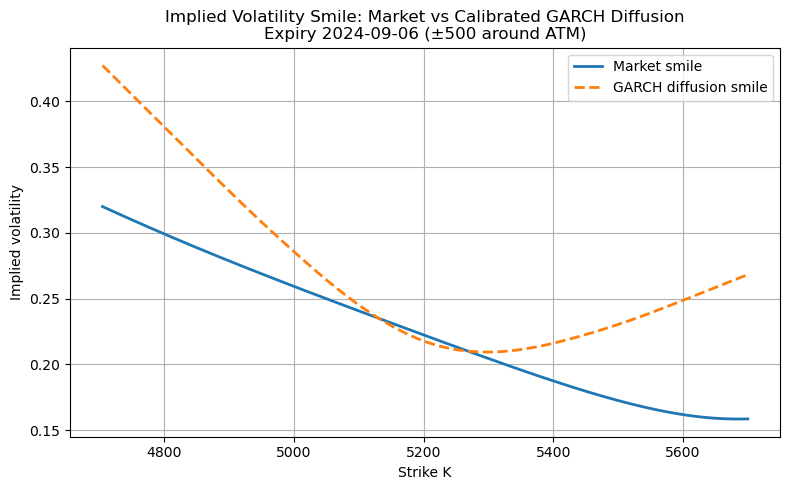

In [ ]:
# ============================================================================
# QUESTION 4: GARCH DIFFUSION CALIBRATION VIA MC + MILSTEIN
# ============================================================================
import math

# ------------------------------------------------------------------
# 1. Load option data and extract the 9/6/2024 maturity slice
# ------------------------------------------------------------------

mid = pd.read_csv("Midprices.csv")

asof_target = "8/7/2024"
exp_target  = "9/6/2024"

data_q4 = mid[
    (mid["As of Date"] == asof_target) &
    (mid["Expiration Date"] == exp_target)
].copy()

# Underlying and maturity (should be constant across this slice)
S0 = float(data_q4["Underlying Price"].iloc[0])
T  = float(data_q4["Time to Expiration"].iloc[0])  # in years

print(f"S0 = {S0:.4f}, T = {T:.6f} years")

D_T = float(estimateDiscountFactor(data_q4))
F_T = float(estimateForwardPrice(data_q4))

# Risk-free rate r implied by D(T) (continuous compounding)
r = -math.log(D_T) / T

print(f"D(T) = {D_T:.6f}, F(T) = {F_T:.4f}, implied r = {r:.6%}")

# ------------------------------------------------------------------
# 3. Extract market call prices for the five calibration strikes
# ------------------------------------------------------------------

calib_strikes = np.array([5105, 5155, 5205, 5255, 5305], dtype=float)

calib_slice = (
    data_q4[data_q4["Strike Price"].isin(calib_strikes)]
    .sort_values("Strike Price")
)

K_calib = calib_slice["Strike Price"].values.astype(float)
C_mkt   = calib_slice["Call Premium"].values.astype(float)

print("Calibration strikes K:", K_calib)
print("Market calls         :", C_mkt)

# ------------------------------------------------------------------
# 5. GARCH diffusion + Milstein scheme (MC simulator)
# ------------------------------------------------------------------

# Given (from the homework text):
v0      = 0.08364961
vBar    = 0.05127939
lambda_ = 1.697994

def simulate_terminal_prices_garch(
    S0, v0, vBar, lambda_, eta, rho, r, T,
    n_paths=5000, n_steps=5000, seed=42
):
    dt      = T / n_steps
    sqrt_dt = math.sqrt(dt)
    rng = np.random.default_rng(seed)

    # work in log S
    X = np.full(n_paths, math.log(S0), dtype=float)
    v = np.full(n_paths, v0,           dtype=float)

    for _ in range(n_steps):
        # independent normals
        z1 = rng.standard_normal(n_paths)
        z2 = rng.standard_normal(n_paths)

        # correlated epsilons (lecture P31)
        eps1 = z1
        eps2 = rho * z1 + math.sqrt(max(1.0 - rho*rho, 0.0)) * z2

        # Milstein for v (GARCH: b(v) = eta * v)
        v = (
            v
            + lambda_ * (vBar - v) * dt
            + eta * v * sqrt_dt * eps2
            + 0.5 * eta**2 * v * dt * (eps2**2 - 1.0)
        )
        v = np.maximum(v, 0.0)  # boundary condition

        # Euler for X = log S (lecture P31)
        X = X + (r - 0.5 * v) * dt + np.sqrt(v) * sqrt_dt * eps1

    S_T = np.exp(X)
    return S_T


def garch_call_prices_for_strikes(Ks, eta, rho,
                                  n_paths=5000, n_steps=5000, seed=123):
    """
    MC price of calls for multiple strikes Ks under GARCH diffusion,
    reusing the same path simulation for all strikes.
    """
    if eta <= 0.0 or abs(rho) >= 1.0:
        # Out-of-domain parameters → huge penalty
        return np.full_like(Ks, 1e9, dtype=float)

    S_T = simulate_terminal_prices_garch(
        S0, v0, vBar, lambda_, eta, rho, r, T,
        n_paths=n_paths, n_steps=n_steps, seed=seed
    )
    disc = math.exp(-r * T)

    prices = []
    for K in Ks:
        payoff = np.maximum(S_T - K, 0.0)
        prices.append(disc * payoff.mean())

    return np.array(prices, dtype=float)

# ------------------------------------------------------------------
# 6. Calibration of (eta, rho)
# ------------------------------------------------------------------

# For speed during development, you can temporarily reduce these;
# for the final run (as in the homework), set both = 5000.
N_PATHS_CALIB = 5000
N_STEPS_CALIB = 5000

def objective_garch(params):
    """
    Objective function: sum of squared errors between
    model prices and market prices for the 5 calibration strikes.
    """
    eta, rho = params
    model_prices = garch_call_prices_for_strikes(
        K_calib, eta, rho,
        n_paths=N_PATHS_CALIB,
        n_steps=N_STEPS_CALIB,
        seed=123  # fixed seed for deterministic objective
    )
    return np.sum((model_prices - C_mkt)**2)

bounds = [
    (0.0001, 20.0),   # eta > 0
    (-1.0,  1.0)      # rho in [-1,1]
]

print("Starting differential evolution calibration for GARCH diffusion...")
result = differential_evolution(
    objective_garch,
    bounds=bounds,
    seed=0,
    polish=True,
    maxiter=10000,   # as requested in the assignment
    tol=1e-4
)

eta_hat, rho_hat = result.x
print("\n=== Calibrated GARCH diffusion parameters ===")
print(f"eta (vol-of-vol) = {eta_hat:.6f}")
print(f"rho (corr)       = {rho_hat:.6f}")
print(f"Objective value  = {result.fun:.6f}")

# ------------------------------------------------------------------
# 7. Build market & model implied volatility smiles (±500 around ATM)
# ------------------------------------------------------------------

# Market strikes within ±500 of S0
atm_center = S0
mask_range = (
    (data_q4["Strike Price"] >= atm_center - 500) &
    (data_q4["Strike Price"] <= atm_center + 500)
)
smile_slice = data_q4[mask_range].copy()

# Average call premium for each strike in this range
grouped = smile_slice.groupby("Strike Price")["Call Premium"].mean().reset_index()
K_smile_mkt = grouped["Strike Price"].values.astype(float)
C_smile_mkt = grouped["Call Premium"].values.astype(float)

# Market implied vols
iv_mkt = np.array([
    implied_vol(c, F_T, K, T, D_T)
    for c, K in zip(C_smile_mkt, K_smile_mkt)
], dtype=float)

# Model prices & implied vols using calibrated (eta_hat, rho_hat)
N_PATHS_SMILE = 5000   # can be larger than calibration paths if you want smoother curves
N_STEPS_SMILE = 5000

S_T_smile = simulate_terminal_prices_garch(
    S0, v0, vBar, lambda_, eta_hat, rho_hat, r, T,
    n_paths=N_PATHS_SMILE, n_steps=N_STEPS_SMILE, seed=123
)
disc = math.exp(-r * T)

C_smile_model = []
iv_model = []

for K in K_smile_mkt:
    payoff = np.maximum(S_T_smile - K, 0.0)
    price  = disc * payoff.mean()
    C_smile_model.append(price)
    iv_model.append(implied_vol(price, F_T, K, T, D_T))

C_smile_model = np.array(C_smile_model, dtype=float)
iv_model      = np.array(iv_model, dtype=float)

# ------------------------------------------------------------------
# 8. Plot smiles
# ------------------------------------------------------------------

plt.figure(figsize=(8, 5))
plt.plot(K_smile_mkt, iv_mkt,    label="Market smile", linewidth=2)
plt.plot(K_smile_mkt, iv_model,  label="GARCH diffusion smile", linewidth=2, linestyle="--")
plt.xlabel("Strike K")
plt.ylabel("Implied volatility")
plt.title("Implied Volatility Smile: Market vs Calibrated GARCH Diffusion\nExpiry 2024-09-06 (±500 around ATM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


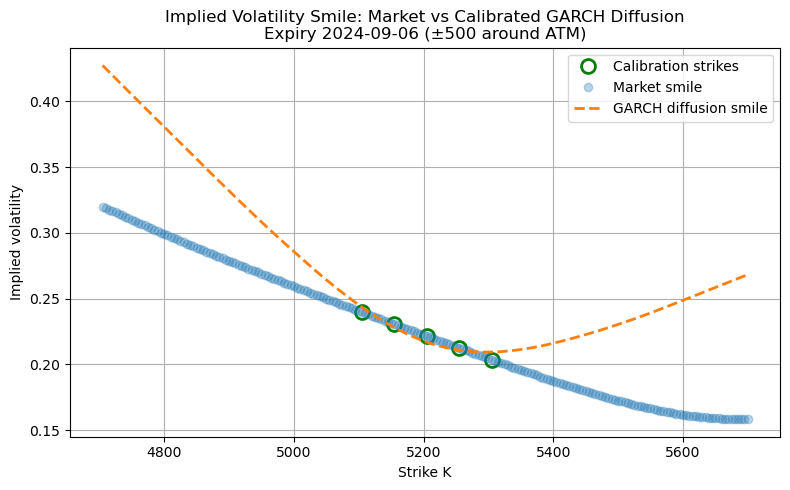

In [ ]:
# Mark the calibrated points
calib_iv_mkt = []
for k in K_calib:
    idx = np.where(K_smile_mkt == k)[0]
    if len(idx) > 0:
        calib_iv_mkt.append(iv_mkt[idx[0]])
        
plt.figure(figsize=(8, 5))
plt.plot(K_calib, calib_iv_mkt, 'go', markersize=10,
         markeredgewidth=2, markerfacecolor='none',
         label="Calibration strikes")
plt.plot(K_smile_mkt, iv_mkt,   "o",  label="Market smile", linewidth=2, alpha=0.3)
plt.plot(K_smile_mkt, iv_model,  label="GARCH diffusion smile", linewidth=2, linestyle="--")
plt.xlabel("Strike K")
plt.ylabel("Implied volatility")
plt.title("Implied Volatility Smile: Market vs Calibrated GARCH Diffusion\nExpiry 2024-09-06 (±500 around ATM)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

### Question 4: Quality of Fit of the GARCH Diffusion

Figure 1 compares the market implied volatility smile with the smile produced by the calibrated GARCH diffusion model for the 9/6/2024 expiry.  
The calibration uses the five strikes $K \in \{5105,5155,5205,5255,5305\}$ and yields:

$ \eta \approx 16.19, \qquad \rho \approx 0.12 $

with an objective value of about $26.3$.

**Local fit near the calibration strikes.**  
Around the five calibration strikes (highlighted in green), the model-implied volatilities are reasonably close to the market smile.  
The GARCH curve passes through the calibration region with only small deviations, so the model matches the prices at those strikes moderately well.

**Global fit over the whole ±500 range.**  
Away from the calibration strikes, the quality of fit deteriorates:

- **Left wing (low strikes).**  
  For $K$ well below the ATM level, the GARCH smile lies significantly *above* the market smile.  
  The model therefore **overestimates implied volatility** for deep ITM puts / low-strike calls and generates a steeper left wing than observed in the data.

- **Right wing (high strikes).**  
  For high strikes, the market smile continues to slope downward, whereas the GARCH smile becomes clearly **U-shaped** and bends upward.  
  As a result, the model again **overstates implied volatilities** on the right wing and fails to reproduce the strong negative skew seen in the SPX options.

**Overall assessment.**  
The calibrated GARCH diffusion achieves a tolerable fit at the five target strikes but provides a rather poor global fit to the observed smile.  
In particular, the model cannot simultaneously match the high left-wing volatilities and the low right-wing volatilities of the market, producing too much curvature and an upward-sloping right wing.  
Compared with the Heston model, the GARCH diffusion delivers a noticeably inferior description of the SPX implied volatility surface for this maturity.